#### Analysis of a single stock - for simulation over the course of 2 years (biweekly buy in)

Goal: This script simulates 2 years of bi-weekly pred/close determinations and simulates for any given stock if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take 1 stock and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied weekly. Assess the theoretical performance of adjusting bi-weekly contributions as compared to contributing a consistent amount every other week


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [3]:
# pull data
# note: you can't choose a stock with less than 3 years of history

# AAPL, AMD, AMZN, CRM, GOOG, INTC, MDB, MSFT, NVDA, QQQ, SBUX, SQ, TSLA, TSM

stock = yf.Ticker("amd")

df = stock.history(period="3y")
#df = stock.history(period="7d", interval = "1m")
df = pd.DataFrame(df['Close'])
df = df.dropna() #in case the first row generates as nulls
df

,Close
Date,
2018-09-04,28.059999
2018-09-05,28.510000
2018-09-06,27.840000
2018-09-07,27.379999
2018-09-10,29.889999
...,...
2021-08-30,111.320000
2021-08-31,110.720001
2021-09-01,109.989998


In [4]:
# add index to df

#df = pd.DataFrame(df['Close'])
add_index = np.arange(1,len(df)+1)

df['Index'] = add_index

df

,Close,Index
Date,,
2018-09-04,28.059999,1
2018-09-05,28.510000,2
2018-09-06,27.840000,3
2018-09-07,27.379999,4
2018-09-10,29.889999,5
...,...,...
2021-08-30,111.320000,753
2021-08-31,110.720001,754
2021-09-01,109.989998,755


In [5]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}
x = (max(df['Index']))-260
y = max(df['Index'])

for i in range(50):
    dataframes['data' + str(i)] = df.iloc[x:y]
    x -= 10
    y -= 10

# show the newest and oldest dataframes
print(dataframes['data0'])
print(dataframes['data49'])

                 Close  Index
Date                         
2020-08-25   86.349998    498
2020-08-26   86.019997    499
2020-08-27   83.800003    500
2020-08-28   85.550003    501
2020-08-31   90.820000    502
...                ...    ...
2021-08-30  111.320000    753
2021-08-31  110.720001    754
2021-09-01  109.989998    755
2021-09-02  109.199997    756
2021-09-03  109.919998    757

[260 rows x 2 columns]
                Close  Index
Date                        
2018-09-13  30.480000      8
2018-09-14  32.720001      9
2018-09-17  32.430000     10
2018-09-18  31.930000     11
2018-09-19  31.209999     12
...               ...    ...
2019-09-19  30.290001    263
2019-09-20  30.049999    264
2019-09-23  30.639999    265
2019-09-24  29.520000    266
2019-09-25  29.540001    267

[260 rows x 2 columns]


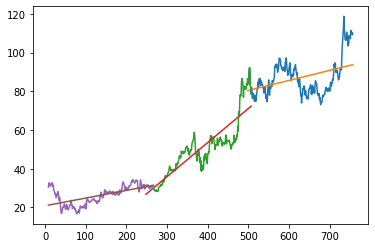

In [6]:
# plot data with a trendline - most recent 260 days

x = dataframes['data0']['Index']
y = dataframes['data0']['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# plot data with a trendline - the middle 260 days

x = dataframes['data25']['Index']
y = dataframes['data25']['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# plot data with a trendline - the oldest 260 days

x = dataframes['data49']['Index']
y = dataframes['data49']['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.show()

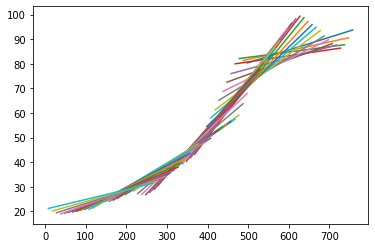

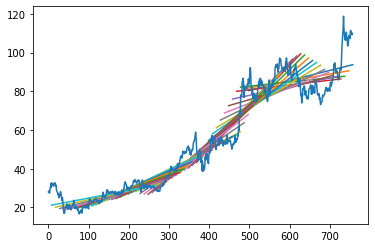

In [7]:
# plot only trendlines, weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for i in range(len(dataframes)):
    x = dataframes['data' + str(i)]['Index']
    y = dataframes['data' + str(i)]['Close']

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

plt.show()

for i in range(len(dataframes)):
    x = dataframes['data' + str(i)]['Index']
    y = dataframes['data' + str(i)]['Close']

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

plt.plot(range(len(df)), df['Close'])
plt.show()

In [8]:
# create pred and pred/close list for each of the 50 dataframes

k = len(dataframes)

for e in range(k):
    nlist = []
    ylist = []

    y = dataframes['data' + str(e)]['Close']
    
    for i in range(1,len(dataframes['data0'])+1): # create pred
        x = range(260)
        m, b = np.polyfit(x, y, 1)
        d = m*i+b
        nlist.append(d)
        
    dataframes['data' + str(e)]['pred'] = nlist
    
    for i in range(1,len(dataframes['data0'])+1): # create pred/close
        d = (dataframes['data' + str(e)]['pred'].iloc[i-1])/(dataframes['data' + str(e)]['Close'].iloc[i-1])
        ylist.append(d)

    dataframes['data' + str(e)]['pred/close'] = ylist

print(dataframes['data49'])
print(dataframes['data0'])

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                Close  Index       pred  pred/close
Date                                               
2018-09-13  30.480000      8  21.223041    0.696294
2018-09-14  32.720001      9  21.262791    0.649841
2018-09-17  32.430000     10  21.302542    0.656878
2018-09-18  31.930000     11  21.342293    0.668409
2018-09-19  31.209999     12  21.382043    0.685102
...               ...    ...        ...         ...
2019-09-19  30.290001    263  31.359458    1.035307
2019-09-20  30.049999    264  31.399209    1.044899
2019-09-23  30.639999    265  31.438959    1.026076
2019-09-24  29.520000    266  31.478710    1.066352
2019-09-25  29.540001    267  31.518461    1.066976

[260 rows x 4 columns]
                 Close  Index       pred  pred/close
Date                                                
2020-08-25   86.349998    498  80.397648    0.931067
2020-08-26   86.019997    499  80.449330    0.935240
2020-08-27   83.800003    500  80.501011    0.960633
2020-08-28   85.550003    501  80.5

In [9]:
# pull the last 'Close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1 year period and the final pred/close derived from a 1 year trendline
# the rows have a 50 week overlap and are separated by 2 weeks

nlist = []
ylist = []
k = len(dataframes['data0'])

for e in reversed(range(len(dataframes))):
    nlist.append(round(dataframes['data' + str(e)]['pred/close'].iloc[k-1],4))
    ylist.append(round(dataframes['data' + str(e)]['Close'].iloc[k-1],4))
    
df = pd.DataFrame(list(zip(ylist, nlist)), columns=['Close', 'pred/close'])
print(df.head())
print('')
print(df.tail())

   Close  pred/close
0  29.54      1.0670
1  28.46      1.1360
2  31.36      1.0590
3  35.93      0.9558
4  40.98      0.8656

     Close  pred/close
45   90.90      0.9646
46   92.15      0.9378
47  110.11      0.7973
48  104.65      0.8659
49  109.92      0.8532


In [10]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

nlist = []
for i in range(len(df)):
    if df['pred/close'].iloc[i] >= 1:
        nlist.append(1)
    else:
        nlist.append(0)

df['>1'] = nlist

print('total weeks:', len(df['>1']))
print('number above 1:', sum(df['>1']))
print('')
print(df)


total weeks: 50
number above 1: 24

     Close  pred/close  >1
0    29.54      1.0670   1
1    28.46      1.1360   1
2    31.36      1.0590   1
3    35.93      0.9558   0
4    40.98      0.8656   0
5    39.62      0.9255   0
6    42.83      0.8884   0
7    48.39      0.8251   0
8    51.05      0.8198   0
9    49.45      0.8836   0
10   58.90      0.7824   0
11   50.11      0.9491   0
12   39.12      1.2272   1
13   43.66      1.1102   1
14   56.95      0.8739   0
15   52.39      0.9887   0
16   54.51      0.9763   0
17   53.80      1.0143   1
18   53.50      1.0402   1
19   50.10      1.1326   1
20   53.59      1.0737   1
21   68.97      0.8590   0
22   82.24      0.7768   0
23   83.08      0.8199   0
24   78.69      0.9213   0
25   77.70      0.9677   0
26   84.48      0.9222   0
27   81.56      0.9869   0
28   76.58      1.0693   1
29   83.36      1.0046   1
30   93.74      0.9207   0
31   96.85      0.9232   0
32   91.71      1.0039   1
33   88.21      1.0737   1
34   87.66      1.1

In [11]:
# create multiple investment strategies and simulate the returns over 2 years
# the strategy that ends up with the most stock for the same amount of money is ultimately the best

print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every otehr week proportional to the pred/close variable - squared')
print('opt3 - contribute 20 only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable - as a fact check (should be lower)')


invest = 500 # max amount to contribute
biwkly_contrib = 10 # how much to contribute each week

df['pred/close2'] = round(df['pred/close']**2,4) # make the value differences a little more pronounced

# baseline - buy in $10 bi-weekly no matter what - baseline
df['baseline'] = 0
df['baseline_stk'] = 0
v = invest
for i in range(len(df)):
    df['baseline'].iloc[i] = biwkly_contrib
    df['baseline_stk'].iloc[i] = round(df['baseline'].iloc[i]/df['Close'].iloc[i],4)
    v -= biwkly_contrib
    if v < biwkly_contrib:
        break
baseline_left = v
        
# opt1 - buy in every other week but proportionally to the pred/close
df['opt1'] = 0
df['opt1_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt1'].iloc[i] = biwkly_contrib*df['pred/close'].iloc[i]
    df['opt1_stk'].iloc[i] = round(df['opt1'].iloc[i]/df['Close'].iloc[i],4)
    v -= biwkly_contrib*df['pred/close'].iloc[i]
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < biwkly_contrib*df['pred/close'].iloc[t]:
        break
opt1_left = v

# opt2 - buy in every other week but proportionally to the pred/close and pred/close is squared to be more dramatic
df['opt2'] = 0
df['opt2_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt2'].iloc[i] = biwkly_contrib*df['pred/close2'].iloc[i]
    df['opt2_stk'].iloc[i] = round(df['opt2'].iloc[i]/df['Close'].iloc[i],4)
    v -= biwkly_contrib*df['pred/close2'].iloc[i]
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < biwkly_contrib*df['pred/close2'].iloc[t]:
        break
opt2_left = v

# opt3 - buy in every other week but proportionally to the pred/close & buy 0 on days <1
df['opt3'] = 0
df['opt3_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt3'].iloc[i] = biwkly_contrib*2*df['>1'].iloc[i] 
    df['opt3_stk'].iloc[i] = round(df['opt3'].iloc[i]/df['Close'].iloc[i],4)
    v -= biwkly_contrib*2*df['>1'].iloc[i]
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < biwkly_contrib*2*df['>1'].iloc[t]:
        break
opt3_left = v

# opt4 - buy in every other week but proportionally to the inverse of pred/close - to verify my method
df['opt4'] = 0
df['opt4_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt4'].iloc[i] = round(biwkly_contrib/df['pred/close'].iloc[i],4)
    df['opt4_stk'].iloc[i] = round(df['opt4'].iloc[i]/df['Close'].iloc[i],4)
    v -= biwkly_contrib*df['pred/close'].iloc[i] # technically wrong, should be a divide, but divide doesn't work???
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < biwkly_contrib/df['pred/close'].iloc[t]:
        break
opt4_left = v


d = {'name': ['baseline', 'op1', 'op2', 'op3', 'op4']
     ,'bought_in': [sum(df['baseline']), sum(df['opt1']), sum(df['opt2']), sum(df['opt3']),sum(df['opt4'])]
     ,'leftover': [baseline_left, opt1_left, opt2_left, opt3_left, opt4_left]
     ,'stocks_held': [round(sum(df['baseline_stk']),4), round(sum(df['opt1_stk']),4), round(sum(df['opt2_stk']),4), 
                     round(sum(df['opt3_stk']),4), round(sum(df['opt4_stk']),4)]
     ,'cost_per_stock': [sum(df['baseline'])/sum(df['baseline_stk']), sum(df['opt1'])/sum(df['opt1_stk']), 
                        sum(df['opt2'])/sum(df['opt2_stk']), sum(df['opt3'])/sum(df['opt3_stk']), 
                        sum(df['opt4'])/sum(df['opt4_stk'])]
     ,'profit': [(sum(df['baseline_stk']) * df['Close'].iloc[49]) - sum(df['baseline']), 
                (sum(df['opt1_stk']) * df['Close'].iloc[49]) - sum(df['opt1']), 
                (sum(df['opt2_stk']) * df['Close'].iloc[49]) - sum(df['opt2']), 
                (sum(df['opt3_stk']) * df['Close'].iloc[49]) - sum(df['opt3']), 
                (sum(df['opt4_stk']) * df['Close'].iloc[49]) - sum(df['opt4'])]
    }

df2 = pd.DataFrame(data=d)

df2['diff'] = 0
df2['diff'].iloc[1] = df2['profit'].iloc[1]-df2['profit'].iloc[0]
df2['diff'].iloc[2] = df2['profit'].iloc[2]-df2['profit'].iloc[0]
df2['diff'].iloc[3] = df2['profit'].iloc[3]-df2['profit'].iloc[0]
df2['diff'].iloc[4] = df2['profit'].iloc[4]-df2['profit'].iloc[0]

df2['%_diff'] = (df2['diff']/df2['profit'])*100
df2

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every otehr week proportional to the pred/close variable - squared
opt3 - contribute 20 only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable - as a fact check (should be lower)


C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,name,bought_in,leftover,stocks_held,cost_per_stock,profit,diff,%_diff
0,baseline,500.0000,0.000,8.1888,61.059007,400.112896,0.000000,0.000000
1,op1,491.5260,8.474,8.1432,60.360301,403.574544,3.461648,0.857747
2,op2,493.9230,6.077,8.2492,59.875261,412.829064,12.716168,3.080250
3,op3,480.0000,20.000,8.1335,59.015184,414.034320,13.921424,3.362384
4,op4,496.8439,8.474,8.1836,60.712144,402.697412,2.584516,0.641801


#### Final notes:

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. opt3 can't be used. This kind of stock will also produce worse than baseline profits because opt1 and opt2 won't be investing the full 500 over the course of the year.

Stocks in a big S-curve, flat ~ spike ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021.

This method seems to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere.


##### Results as compared to the baseline (on 9/3/2021):

aapl - opt1: -6.44, opt2: -8.45 <br>
amd - opt1: +3.46, opt2: +12.71 <br>
amzn - opt1: -0.37, opt2: -0.89 <br>
crm - opt1: +5.94, opt2: +13.76 <br>
goog - opt1: -1.36, opt2: -0.50<br>
intc - opt1: +3.79, opt2: +7.30 <br>
mdb - opt1: +47.50, opt2: +115.95 *huge spike on 9/3/2021, exclude due to misleadingly high<br>
msft - opt1: +1.86, opt2: +4.54 <br>
nvda - opt1: -52.65, opt2: -92.44 *big losses<br>
qqq - opt1: -0.13, opt2: +1.20 <br>
sbux - opt1: +10.61, opt2: +27.05<br>
sq - opt1: +22.96, opt2: +93.04 *big gains<br>
tsla - opt1: -242.28, opt2: -357.03 *big losses<br>
tsm - opt1: -2.85, opt2: +0.40<br>

Excluding MDB (due to misleadingly high extra profits), opt1 nets -209.96, opt2 nets -183.36. investing 500 into 13 stocks over 2 years (6500 total investment), with 183.36 losses over baseline. 2.82% worse than baseline.

In [12]:
df

,Close,pred/close,>1,pred/close2,baseline,baseline_stk,opt1,opt1_stk,opt2,opt2_stk,opt3,opt3_stk,opt4,opt4_stk
0,29.54,1.0670,1,1.1385,10,0.3385,10.670,0.3612,11.385,0.3854,20,0.6770,9.3721,0.3173
1,28.46,1.1360,1,1.2905,10,0.3514,11.360,0.3992,12.905,0.4534,20,0.7027,8.8028,0.3093
2,31.36,1.0590,1,1.1215,10,0.3189,10.590,0.3377,11.215,0.3576,20,0.6378,9.4429,0.3011
3,35.93,0.9558,0,0.9136,10,0.2783,9.558,0.2660,9.136,0.2543,0,0.0000,10.4624,0.2912
4,40.98,0.8656,0,0.7493,10,0.2440,8.656,0.2112,7.493,0.1828,0,0.0000,11.5527,0.2819
5,39.62,0.9255,0,0.8566,10,0.2524,9.255,0.2336,8.566,0.2162,0,0.0000,10.8050,0.2727
6,42.83,0.8884,0,0.7893,10,0.2335,8.884,0.2074,7.893,0.1843,0,0.0000,11.2562,0.2628
7,48.39,0.8251,0,0.6808,10,0.2067,8.251,0.1705,6.808,0.1407,0,0.0000,12.1197,0.2505
8,51.05,0.8198,0,0.6721,10,0.1959,8.198,0.1606,6.721,0.1317,0,0.0000,12.1981,0.2389
9,49.45,0.8836,0,0.7807,10,0.2022,8.836,0.1787,7.807,0.1579,0,0.0000,11.3173,0.2289
